In [1]:
import pandas as pd
import numpy as np

step 1  load dataset

In [21]:
data=pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


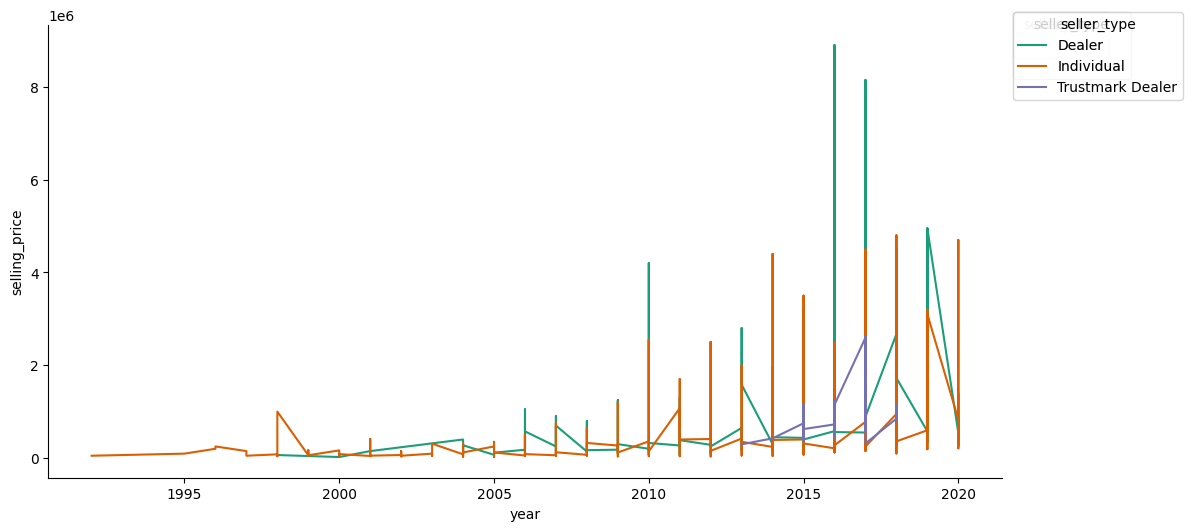

In [4]:
# @title year vs selling_price

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['selling_price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('seller_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='seller_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('selling_price')

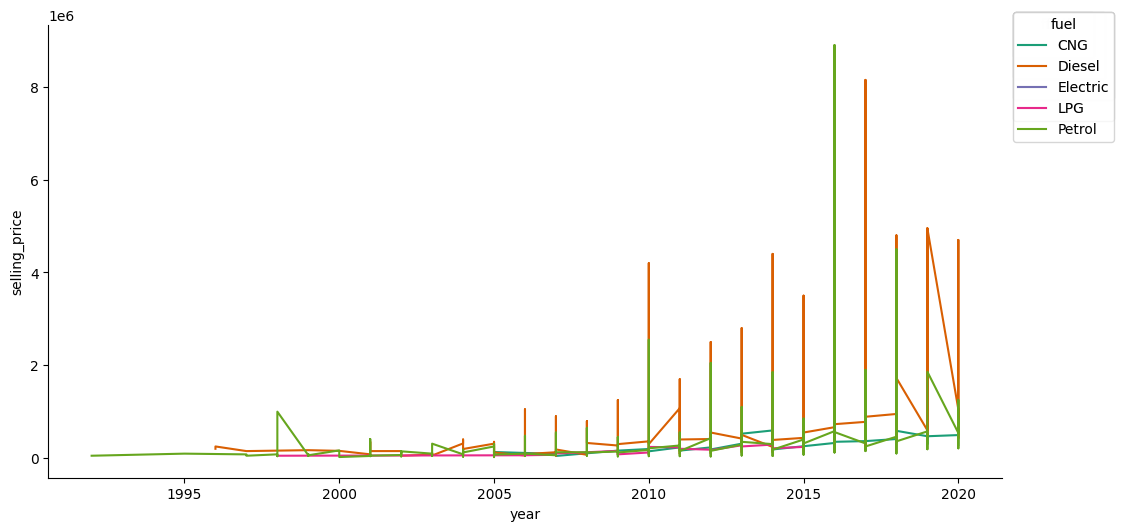

In [5]:
# @title year vs selling_price

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['selling_price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('fuel')):
  _plot_series(series, series_name, i)
  fig.legend(title='fuel', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('selling_price')

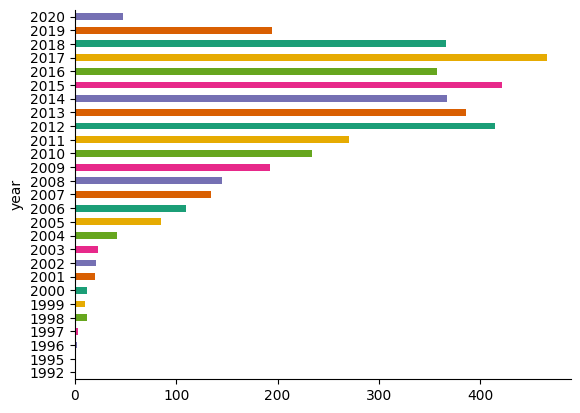

In [6]:
# fuel

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('year').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
data.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


**Dataset description and datatypes**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


Statistics calculation

In [9]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [10]:
data.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


<Axes: xlabel='year', ylabel='selling_price'>

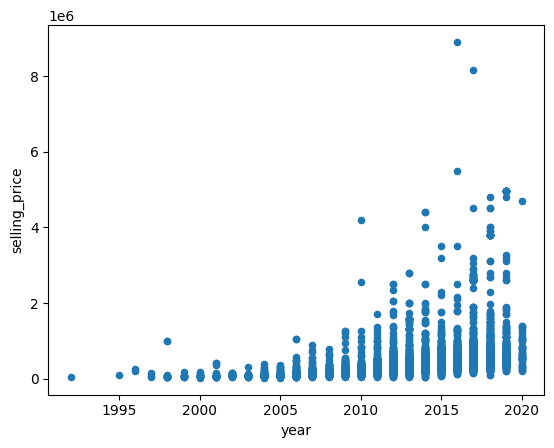

In [11]:
data.plot('year','selling_price',kind='scatter')


In [48]:
data.shape

(4340, 8)

**Data preprocessing**

In [22]:
data['age']=2021-data['year']
data.drop('year',axis=1,inplace=True)

In [49]:
data.rename(columns={'selling_price':'Selling_Price(lacs)','owner':'Past_Owners'},inplace = True)

**EDA --> Exploratory data analysis**

In [50]:
data.columns

Index(['name', 'Selling_Price(lacs)', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'Past_Owners', 'age'],
      dtype='object')

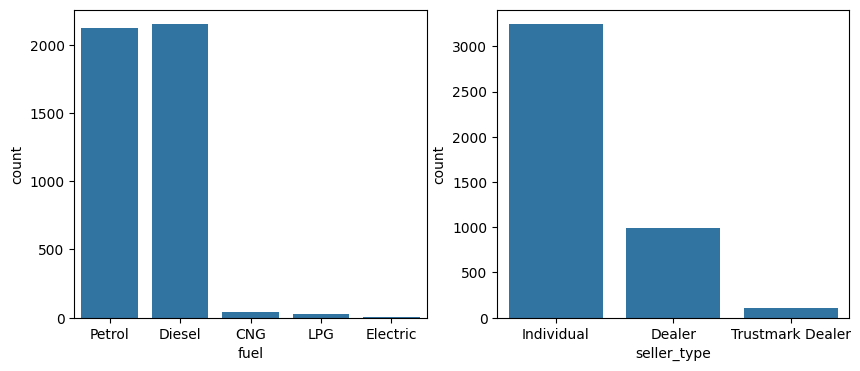

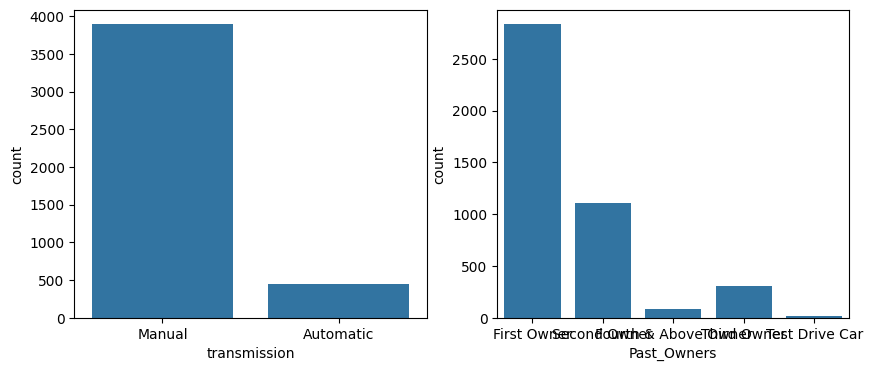

In [52]:
cat_cols = ['fuel','seller_type','transmission','Past_Owners']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)

    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=data)
    i += 1

    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=data)
    i += 1

    plt.show()

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 4340 non-null   object
 1   Selling_Price(lacs)  4340 non-null   int64 
 2   km_driven            4340 non-null   int64 
 3   fuel                 4340 non-null   object
 4   seller_type          4340 non-null   object
 5   transmission         4340 non-null   object
 6   Past_Owners          4340 non-null   object
 7   age                  4340 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


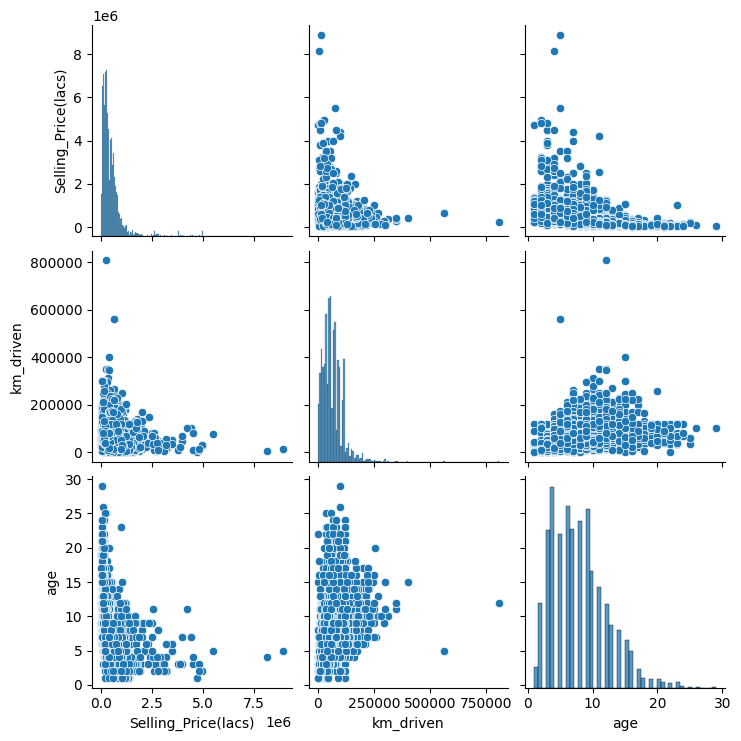

In [59]:
import seaborn as sns
sns.pairplot(data)


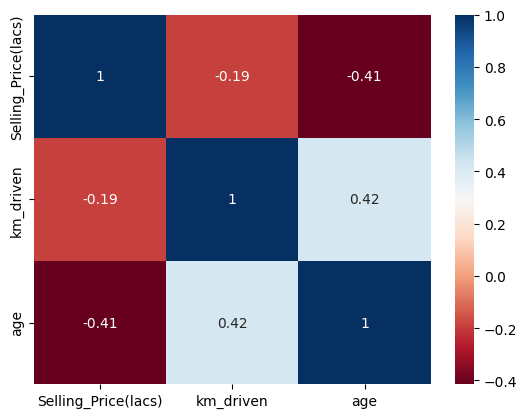

In [63]:
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap="RdBu")
plt.show()
